In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("aug_train.csv")

In [5]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
data.shape

(19158, 14)

In [9]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [10]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
data[['relevent_experience','experience','last_new_job']].sample(15)

,relevent_experience,experience,last_new_job
3974,Has relevent experience,3,1
18557,No relevent experience,3,NaN
847,No relevent experience,7,never
4121,No relevent experience,>20,>4
19027,No relevent experience,6,never
5071,Has relevent experience,4,4
12779,No relevent experience,NaN,4
8047,Has relevent experience,8,4
13547,No relevent experience,<1,1
7990,No relevent experience,14,never


In [12]:
data.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [13]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [14]:
data.describe(include="all")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [15]:
data["city"].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [16]:
data["major_discipline"].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [17]:
data["major_discipline"].replace(["Business Degree", "No Major"],
                             ["Business_Degree","No_Major"],inplace=True)

In [18]:
data["major_discipline"].value_counts()

STEM               14492
Humanities           669
Other                381
Business_Degree      327
Arts                 253
No_Major             223
Name: major_discipline, dtype: int64

In [19]:
data["gender"].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [20]:
data["relevent_experience"].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [21]:
data["enrolled_university"].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [22]:
data["enrolled_university"].replace(["Full time course", "Part time course"],
                             ['Full_time_course','Part_time_course'],inplace=True)

In [23]:
data["enrolled_university"].value_counts()

no_enrollment       13817
Full_time_course     3757
Part_time_course     1198
Name: enrolled_university, dtype: int64

In [24]:
data["education_level"].replace(["High School", "Primary School"],
                             ['High_School','Primary_School'],inplace=True)

In [25]:
data["major_discipline"].value_counts()

STEM               14492
Humanities           669
Other                381
Business_Degree      327
Arts                 253
No_Major             223
Name: major_discipline, dtype: int64

In [26]:
data["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [27]:
data["company_type"].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [28]:
data["company_type"].replace(["Pvt Ltd","Funded Startup","Public Sector","Early Stage Startup"],
                             ["Pvt_Ltd","Funded_Startup","Public_Sector","Early_Stage_Startup"],inplace=True)

In [29]:
data["company_type"].value_counts()

Pvt_Ltd                9817
Funded_Startup         1001
Public_Sector           955
Early_Stage_Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [30]:
data["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

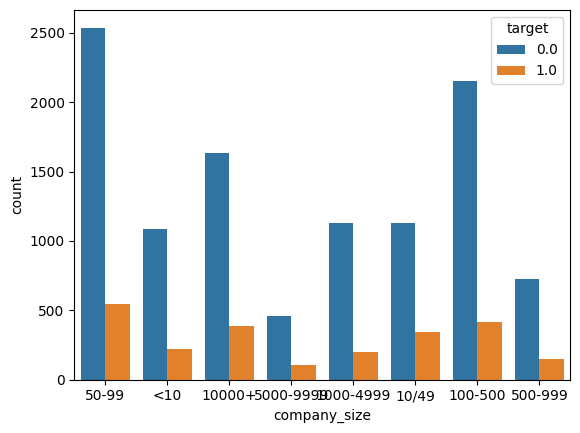

In [31]:
sns.countplot(data=data,x="company_size", hue="target")
plt.savefig("cs_image.png")

In [32]:
#formatting company_size for better use and understanding.
data["company_size"].replace(["<10","10/49", "50-99", "100-500", "500-999", "1000-4999", "5000-9999", "10000+"],
                             ["Startup","Small","Small","Medium","Medium","Large","Large","Large"],inplace=True)

In [33]:
data["company_size"].value_counts()

Small      4554
Large      3910
Medium     3448
Startup    1308
Name: company_size, dtype: int64

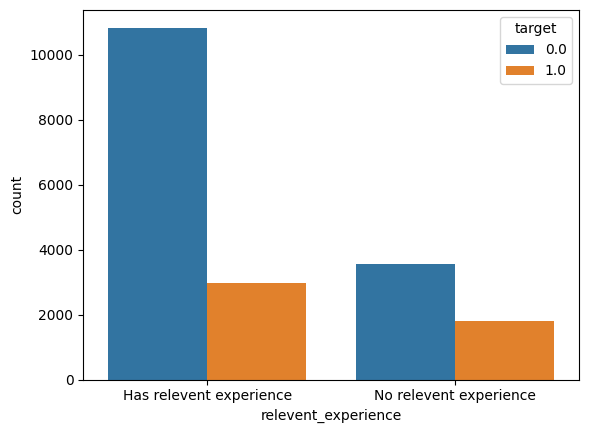

In [34]:
sns.countplot(data=data,x="relevent_experience", hue="target")
plt.savefig("re_image.png")

In [35]:
#formatting relevent_experience for better use and understanding.
data["relevent_experience"].replace(["Has relevent experience", "No relevent experience"],
                             ['Yes','No'],inplace=True)

In [36]:
data["relevent_experience"].value_counts()

Yes    13792
No      5366
Name: relevent_experience, dtype: int64

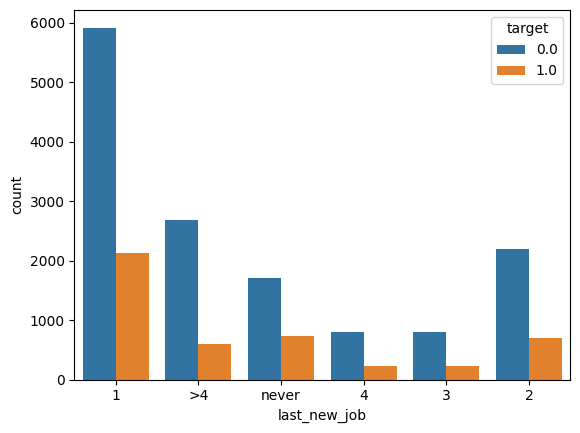

In [37]:
sns.countplot(data=data,x="last_new_job", hue="target")
plt.savefig("job_image.png")

In [38]:
#formatting last_new_job for better use and understanding.
data["last_new_job"].replace(["never"],["0"],inplace=True)

**Performing Null Value Detection**

In [39]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [40]:
sel_status =data["target"].value_counts()

In [41]:
sel_status

0.0    14381
1.0     4777
Name: target, dtype: int64

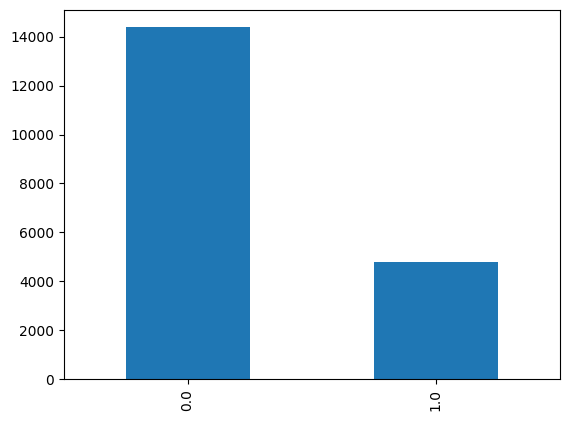

In [42]:
#Target Variable
data['target'].value_counts().plot.bar()
plt.savefig("target_image.png")

**The data is imbalanced. most of the candidates/employee wants to work with the company .**

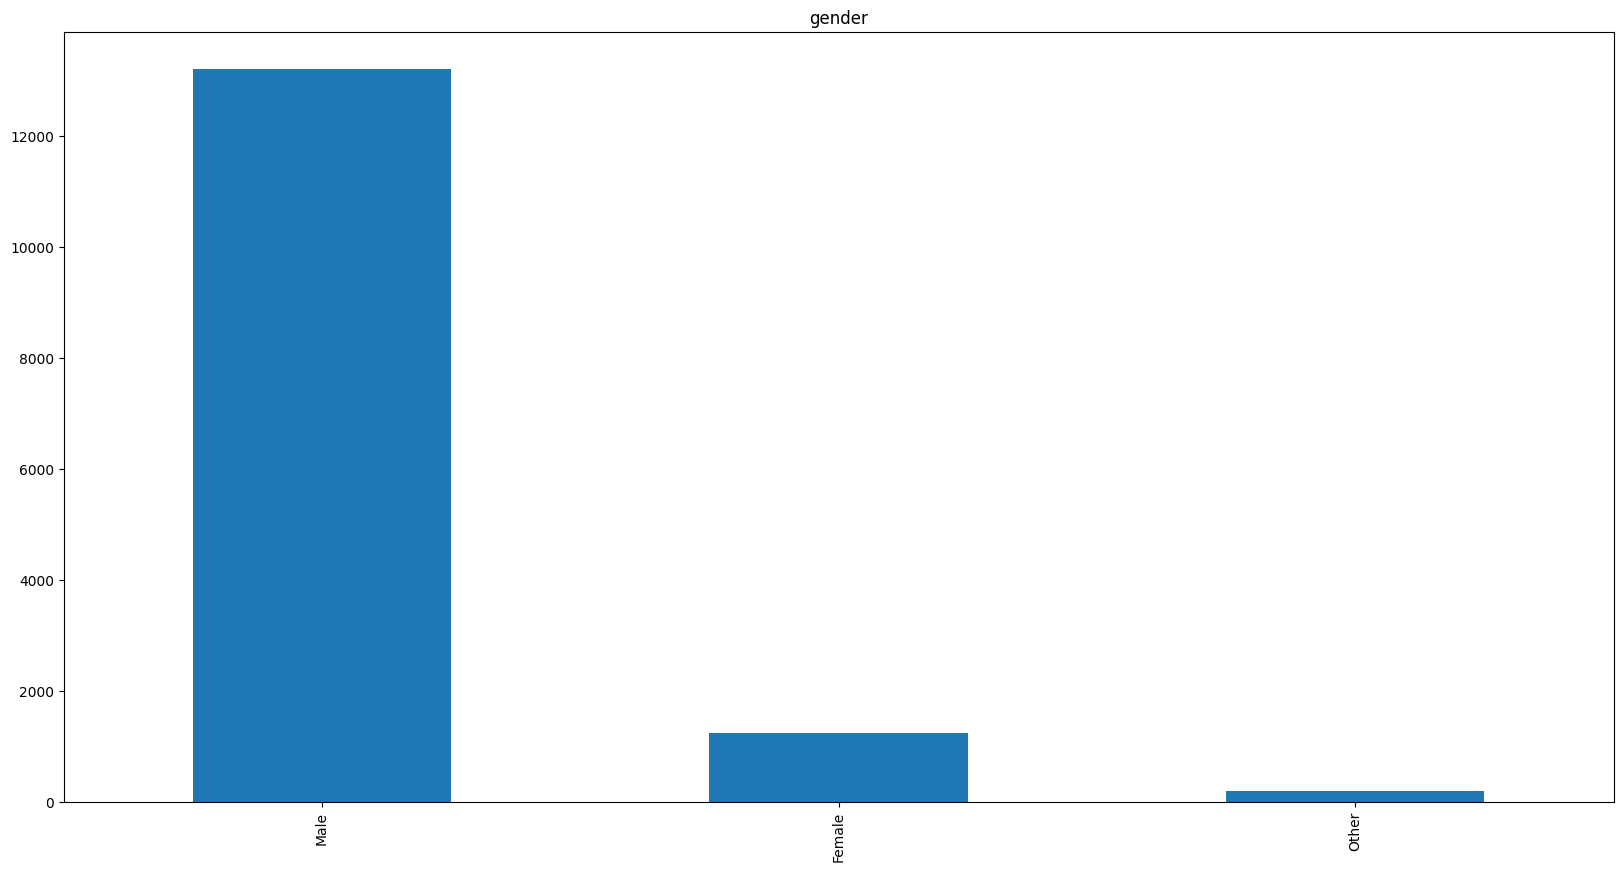

In [43]:
data["gender"].value_counts().plot.bar(figsize=(20,10), title= "gender")
plt.savefig("gender_image.png")
plt.show()

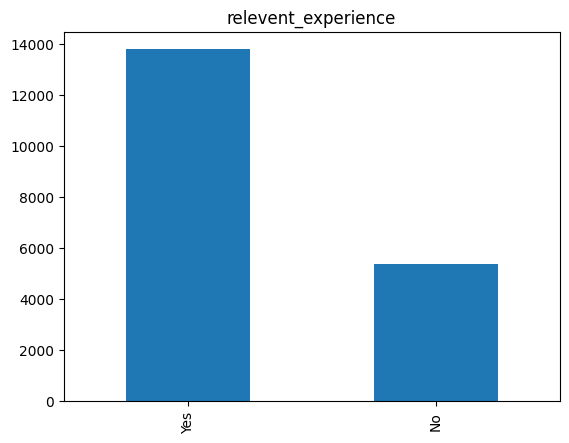

In [44]:
data['relevent_experience'].value_counts().plot.bar(title= "relevent_experience")
plt.savefig("graph8_image.png")
plt.show()

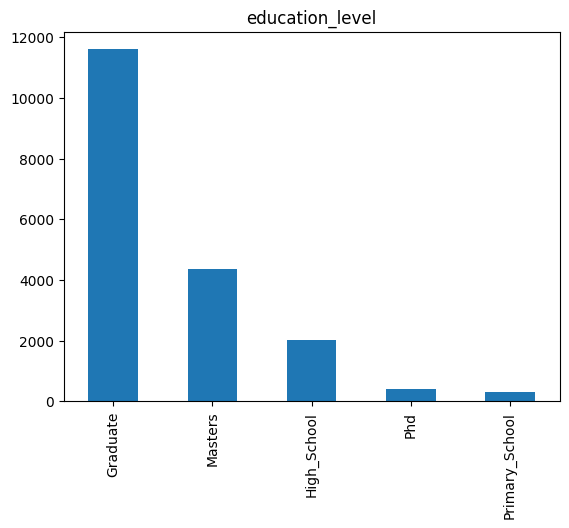

In [45]:
data["education_level"].value_counts().plot.bar(title= "education_level")
plt.savefig("graph7_image.png")
plt.show()

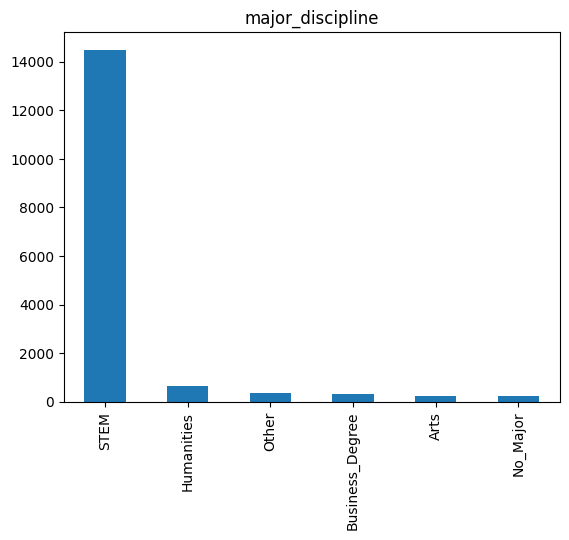

In [46]:
data["major_discipline"].value_counts().plot.bar(title="major_discipline")
plt.savefig("graph6_image.png")
plt.show()

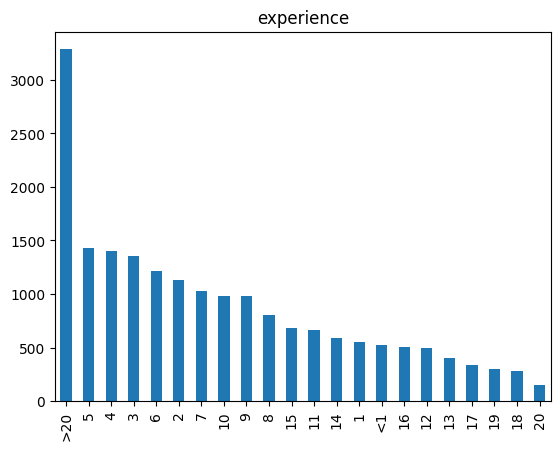

In [47]:
data["experience"].value_counts().plot.bar(title="experience")
plt.savefig("graph5_image.png")
plt.show()

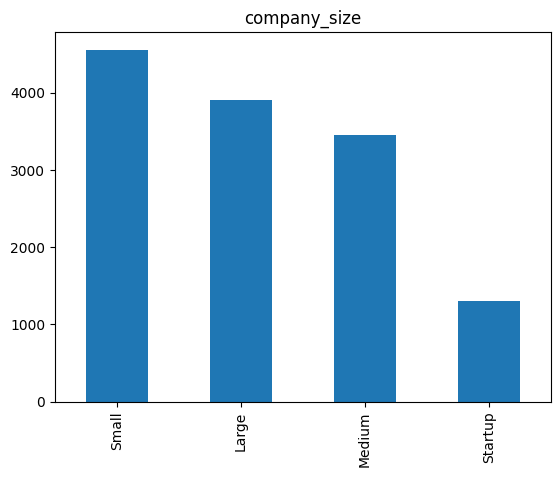

In [48]:
data["company_size"].value_counts().plot.bar(title="company_size")
plt.savefig("graph4_image.png")
plt.show()

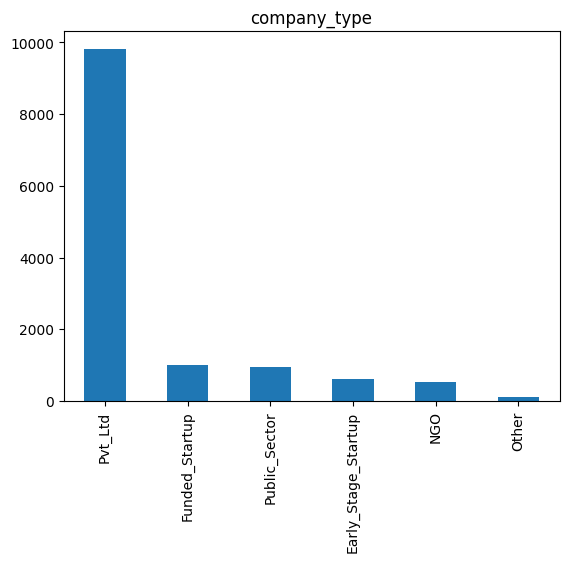

In [49]:
data["company_type"].value_counts().plot.bar(title="company_type")
plt.savefig("graph3_image.png")
plt.show()

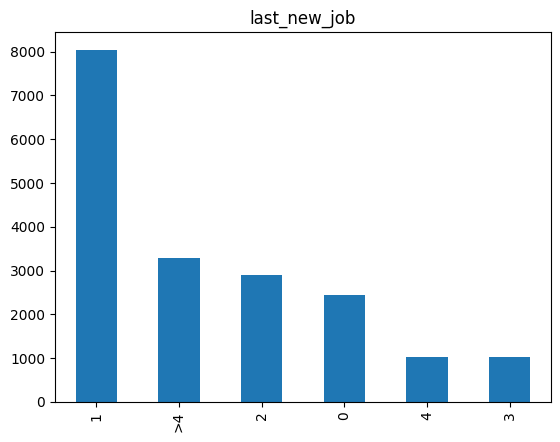

In [50]:
data["last_new_job"].value_counts().plot.bar(title="last_new_job")
plt.savefig("graph2_image.png")
plt.show()

**bivariate analysis**

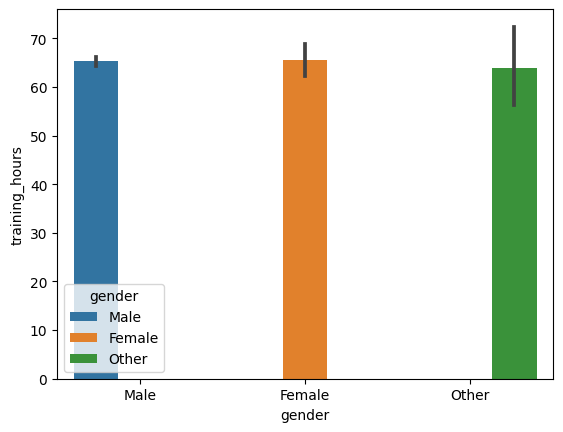

In [51]:
sns.barplot(data=data, x="gender", y="training_hours", hue="gender")
plt.savefig("graph0_image.png")
# 'hue' is used to visualize the data of different categories in one plot.

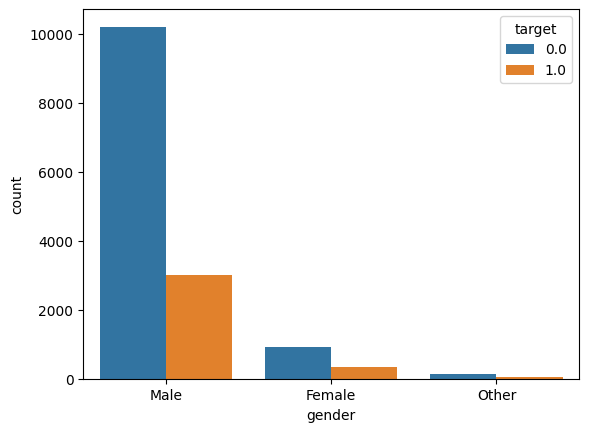

In [52]:
sns.countplot(data=data, x="gender", hue="target")
plt.savefig("gender_image1.png")

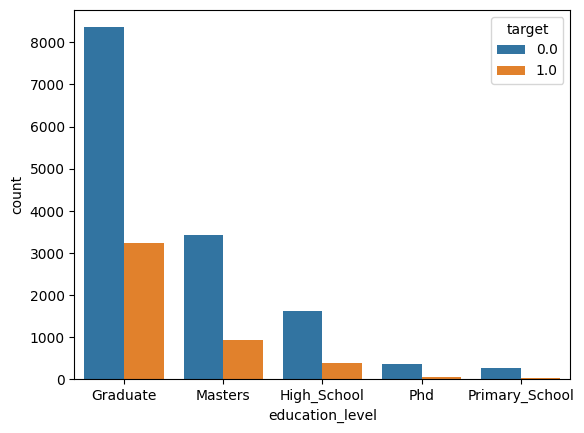

In [53]:
sns.countplot(data=data, x="education_level", hue="target")
plt.savefig("edu_image.png")

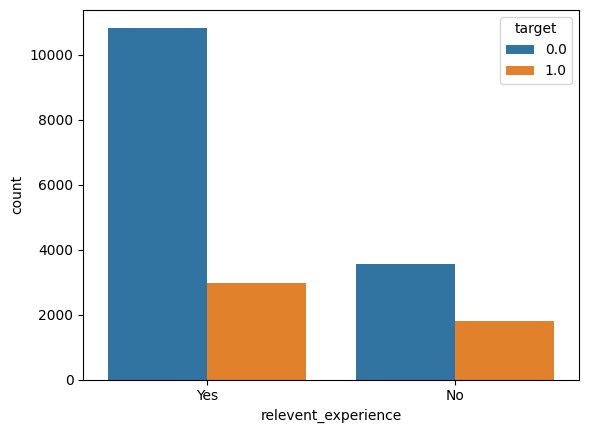

In [54]:
sns.countplot(data=data,x="relevent_experience",hue="target")
plt.savefig("rel_image.png")

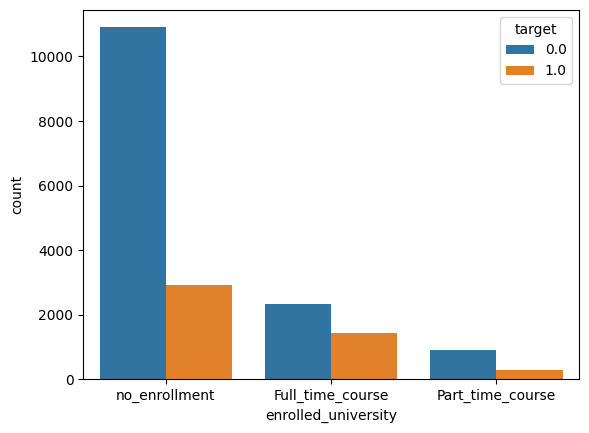

In [55]:
sns.countplot(data=data, x="enrolled_university",hue="target")
plt.savefig("uni_image.png")

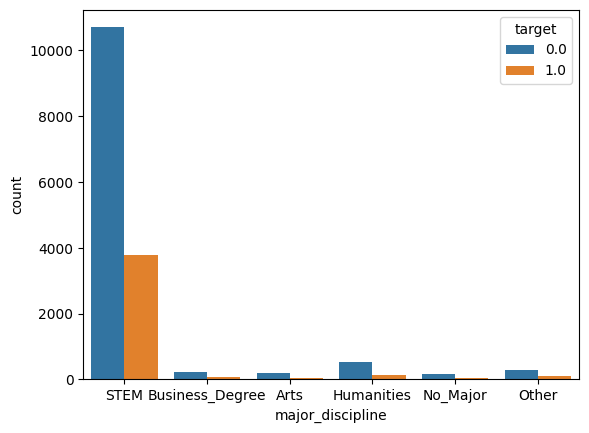

In [56]:
sns.countplot(data=data ,x="major_discipline" ,  hue="target")
plt.savefig("dis_image.png")

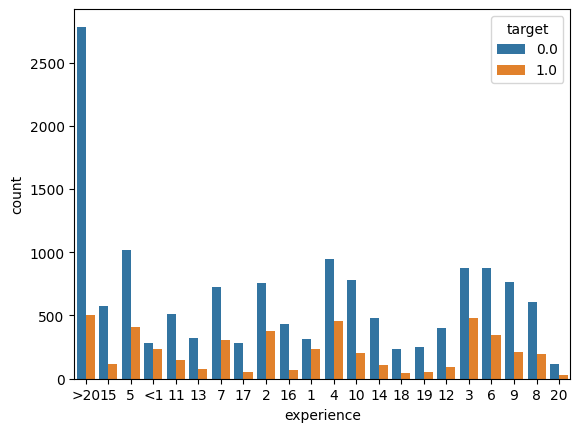

In [57]:
sns.countplot(data=data ,x="experience" ,  hue="target")
plt.savefig("exp_image.png")

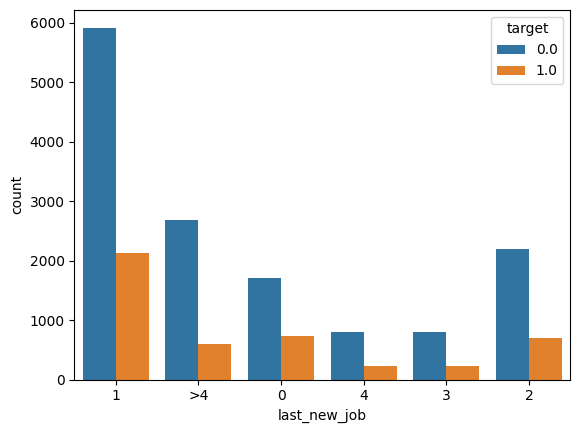

In [58]:
sns.countplot(data=data,x="last_new_job", hue="target")
plt.savefig("lastnew_image.png")

<Axes: xlabel='company_size', ylabel='count'>

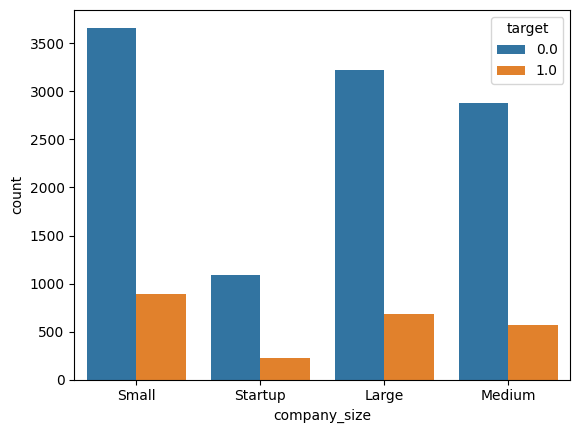

In [59]:
sns.countplot(data=data,x="company_size", hue="target")

<Axes: xlabel='company_type', ylabel='count'>

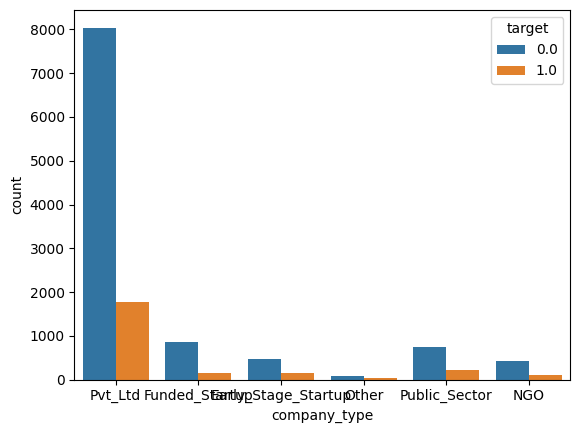

In [60]:
sns.countplot(data=data,x="company_type", hue="target")


<Axes: xlabel='training_hours', ylabel='Count'>

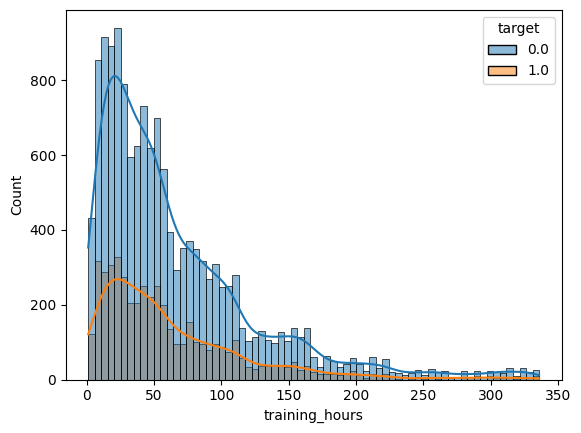

In [61]:
sns.histplot(data=data,x="training_hours", hue="target",kde=True )

<Axes: xlabel='relevent_experience', ylabel='count'>

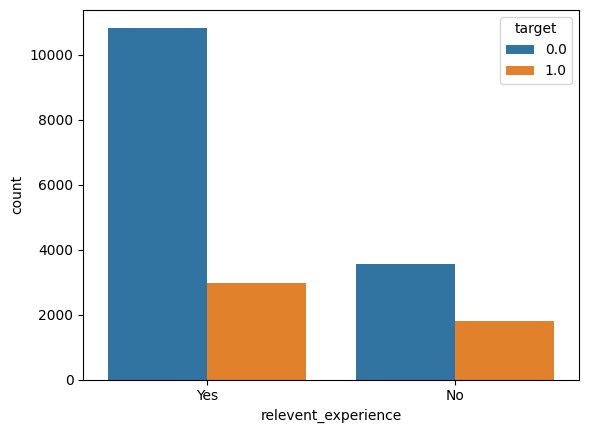

In [62]:
sns.countplot(data=data,x="relevent_experience", hue="target")

<ipython-input-63-413b5f8e13bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True,linewidths=0.1,annot_kws={"fontsize":6})


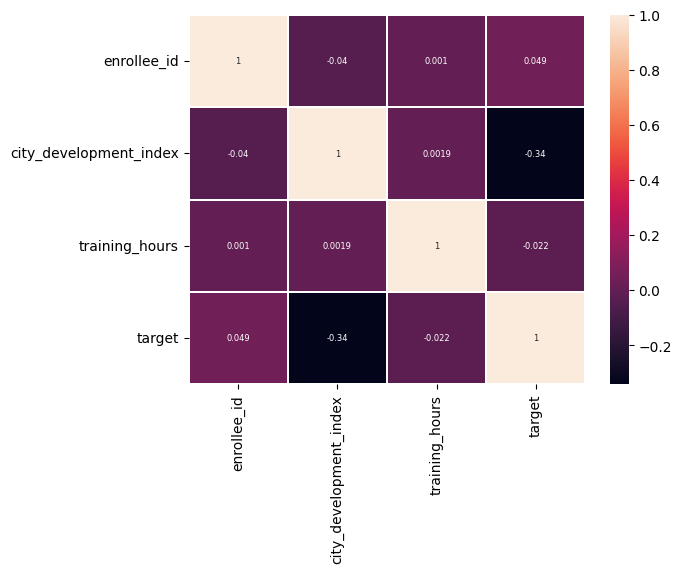

In [63]:
sns.heatmap(data.corr(),annot = True,linewidths=0.1,annot_kws={"fontsize":6})
plt.show()

In [64]:
data["company_size"].fillna(value="NW",inplace=True) #not working yet
data["company_type"].fillna(value="NW",inplace=True)
data["gender"].fillna(value="DNM",inplace=True) #Didnot mention
data["enrolled_university"].fillna(data["enrolled_university"].mode()[0],inplace=True)
data["education_level"].fillna(data["education_level"].mode()[0],inplace=True)
data["major_discipline"].fillna(data["major_discipline"].mode()[0],inplace =True)
data["experience"].fillna(data["experience"].mode()[0],inplace=True)
data["last_new_job"].fillna(data["last_new_job"].mode()[0],inplace=True)

<Axes: xlabel='company_size', ylabel='count'>

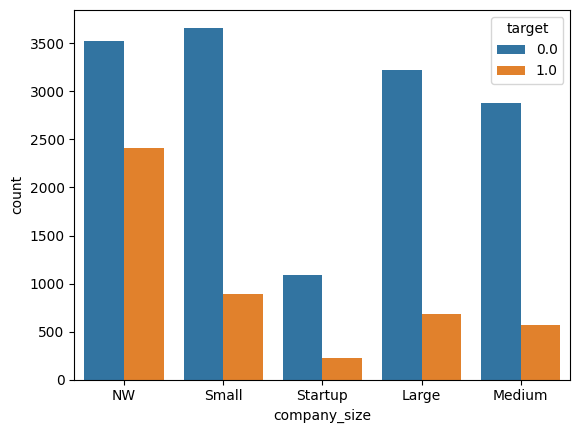

In [65]:
sns.countplot(data=data,x="company_size", hue="target")

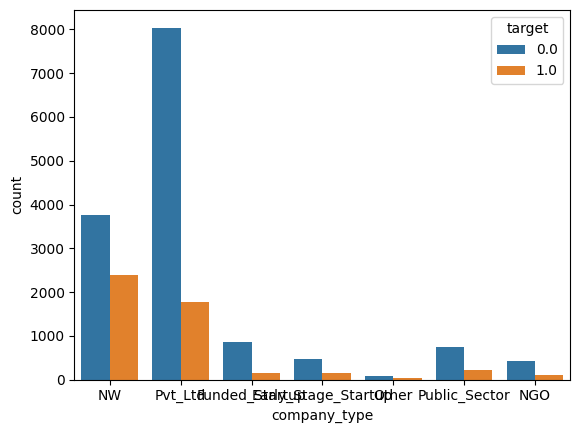

In [66]:
sns.countplot(data=data,x="company_type", hue="target")
plt.savefig("comptype_image.png")

<Axes: xlabel='gender', ylabel='count'>

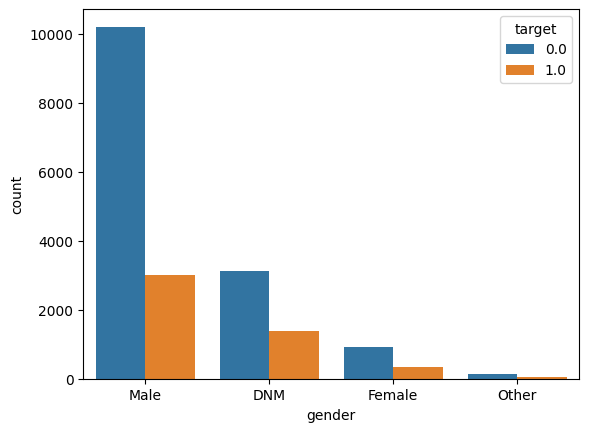

In [67]:
sns.countplot(data=data,x="gender", hue="target")

In [68]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [69]:
data["gender"].value_counts()

Male      13221
DNM        4508
Female     1238
Other       191
Name: gender, dtype: int64

**OUTLIER DETECTION**

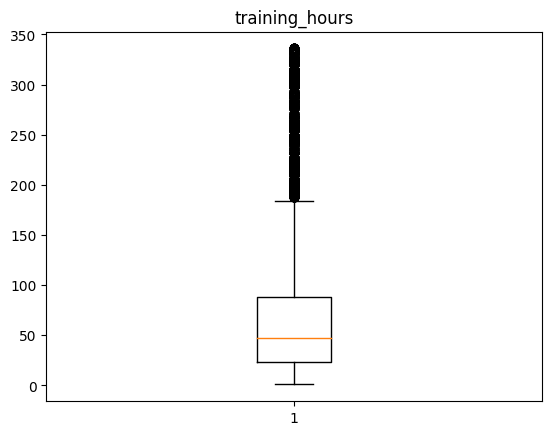

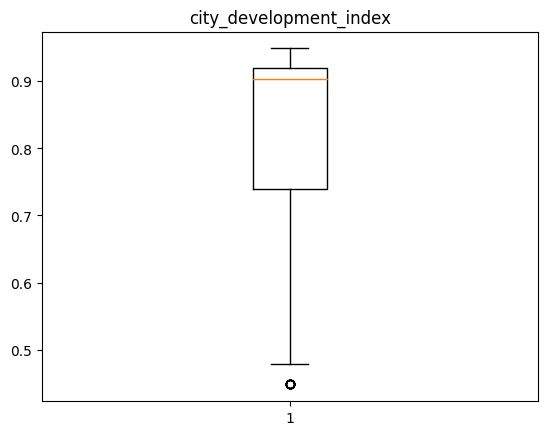

In [70]:
num_col = ["training_hours","city_development_index"]
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

**ENCODING DATA**

In [71]:
train=data.drop(['enrollee_id',"city"],axis=1) # dropping enrollee id and city
train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,NW,NW,1,36,1.0
1,0.776,Male,No,no_enrollment,Graduate,STEM,15,Small,Pvt_Ltd,>4,47,0.0
2,0.624,DNM,No,Full_time_course,Graduate,STEM,5,NW,NW,0,83,0.0
3,0.789,DNM,No,no_enrollment,Graduate,Business_Degree,<1,NW,Pvt_Ltd,0,52,1.0
4,0.767,Male,Yes,no_enrollment,Masters,STEM,>20,Small,Funded_Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No,no_enrollment,Graduate,Humanities,14,NW,NW,1,42,1.0
19154,0.920,Male,Yes,no_enrollment,Graduate,STEM,14,NW,NW,4,52,1.0
19155,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,Small,Pvt_Ltd,4,44,0.0
19156,0.802,Male,Yes,no_enrollment,High_School,STEM,<1,Medium,Pvt_Ltd,2,97,0.0


In [72]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [73]:
train["relevent_experience"] = le.fit_transform(train["relevent_experience"])
train["education_level"] = le.fit_transform(train["education_level"])
train["experience"] = le.fit_transform(train["experience"])
train["company_size"] = le.fit_transform(train["company_size"])
train["last_new_job"] = le.fit_transform(train["last_new_job"])

In [74]:
train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,1,no_enrollment,0,STEM,21,2,NW,1,36,1.0
1,0.776,Male,0,no_enrollment,0,STEM,6,3,Pvt_Ltd,5,47,0.0
2,0.624,DNM,0,Full_time_course,0,STEM,15,2,NW,0,83,0.0
3,0.789,DNM,0,no_enrollment,0,Business_Degree,20,2,Pvt_Ltd,0,52,1.0
4,0.767,Male,1,no_enrollment,2,STEM,21,3,Funded_Startup,4,8,0.0


In [75]:
train["gender"] = le.fit_transform(train["gender"])

In [76]:
train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,2,1,no_enrollment,0,STEM,21,2,NW,1,36,1.0
1,0.776,2,0,no_enrollment,0,STEM,6,3,Pvt_Ltd,5,47,0.0
2,0.624,0,0,Full_time_course,0,STEM,15,2,NW,0,83,0.0
3,0.789,0,0,no_enrollment,0,Business_Degree,20,2,Pvt_Ltd,0,52,1.0
4,0.767,2,1,no_enrollment,2,STEM,21,3,Funded_Startup,4,8,0.0


In [77]:
train = pd.get_dummies(train)
train

,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,enrolled_university_Full_time_course,...,major_discipline_No_Major,major_discipline_Other,major_discipline_STEM,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd
0,0.920,2,1,0,21,2,1,36,1.0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.776,2,0,0,6,3,5,47,0.0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.624,0,0,0,15,2,0,83,0.0,1,...,0,0,1,0,0,0,1,0,0,0
3,0.789,0,0,0,20,2,0,52,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.767,2,1,2,21,3,4,8,0.0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,2,0,0,5,2,1,42,1.0,0,...,0,0,0,0,0,0,1,0,0,0
19154,0.920,2,1,0,5,2,4,52,1.0,0,...,0,0,1,0,0,0,1,0,0,0
19155,0.920,2,1,0,21,3,4,44,0.0,0,...,0,0,1,0,0,0,0,0,0,1
19156,0.802,2,1,1,20,1,2,97,0.0,0,...,0,0,1,0,0,0,0,0,0,1


In [78]:
train.shape

(19158, 25)

In [79]:
train.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'education_level', 'experience', 'company_size', 'last_new_job',
       'training_hours', 'target', 'enrolled_university_Full_time_course',
       'enrolled_university_Part_time_course',
       'enrolled_university_no_enrollment', 'major_discipline_Arts',
       'major_discipline_Business_Degree', 'major_discipline_Humanities',
       'major_discipline_No_Major', 'major_discipline_Other',
       'major_discipline_STEM', 'company_type_Early_Stage_Startup',
       'company_type_Funded_Startup', 'company_type_NGO', 'company_type_NW',
       'company_type_Other', 'company_type_Public_Sector',
       'company_type_Pvt_Ltd'],
      dtype='object')

<Axes: >

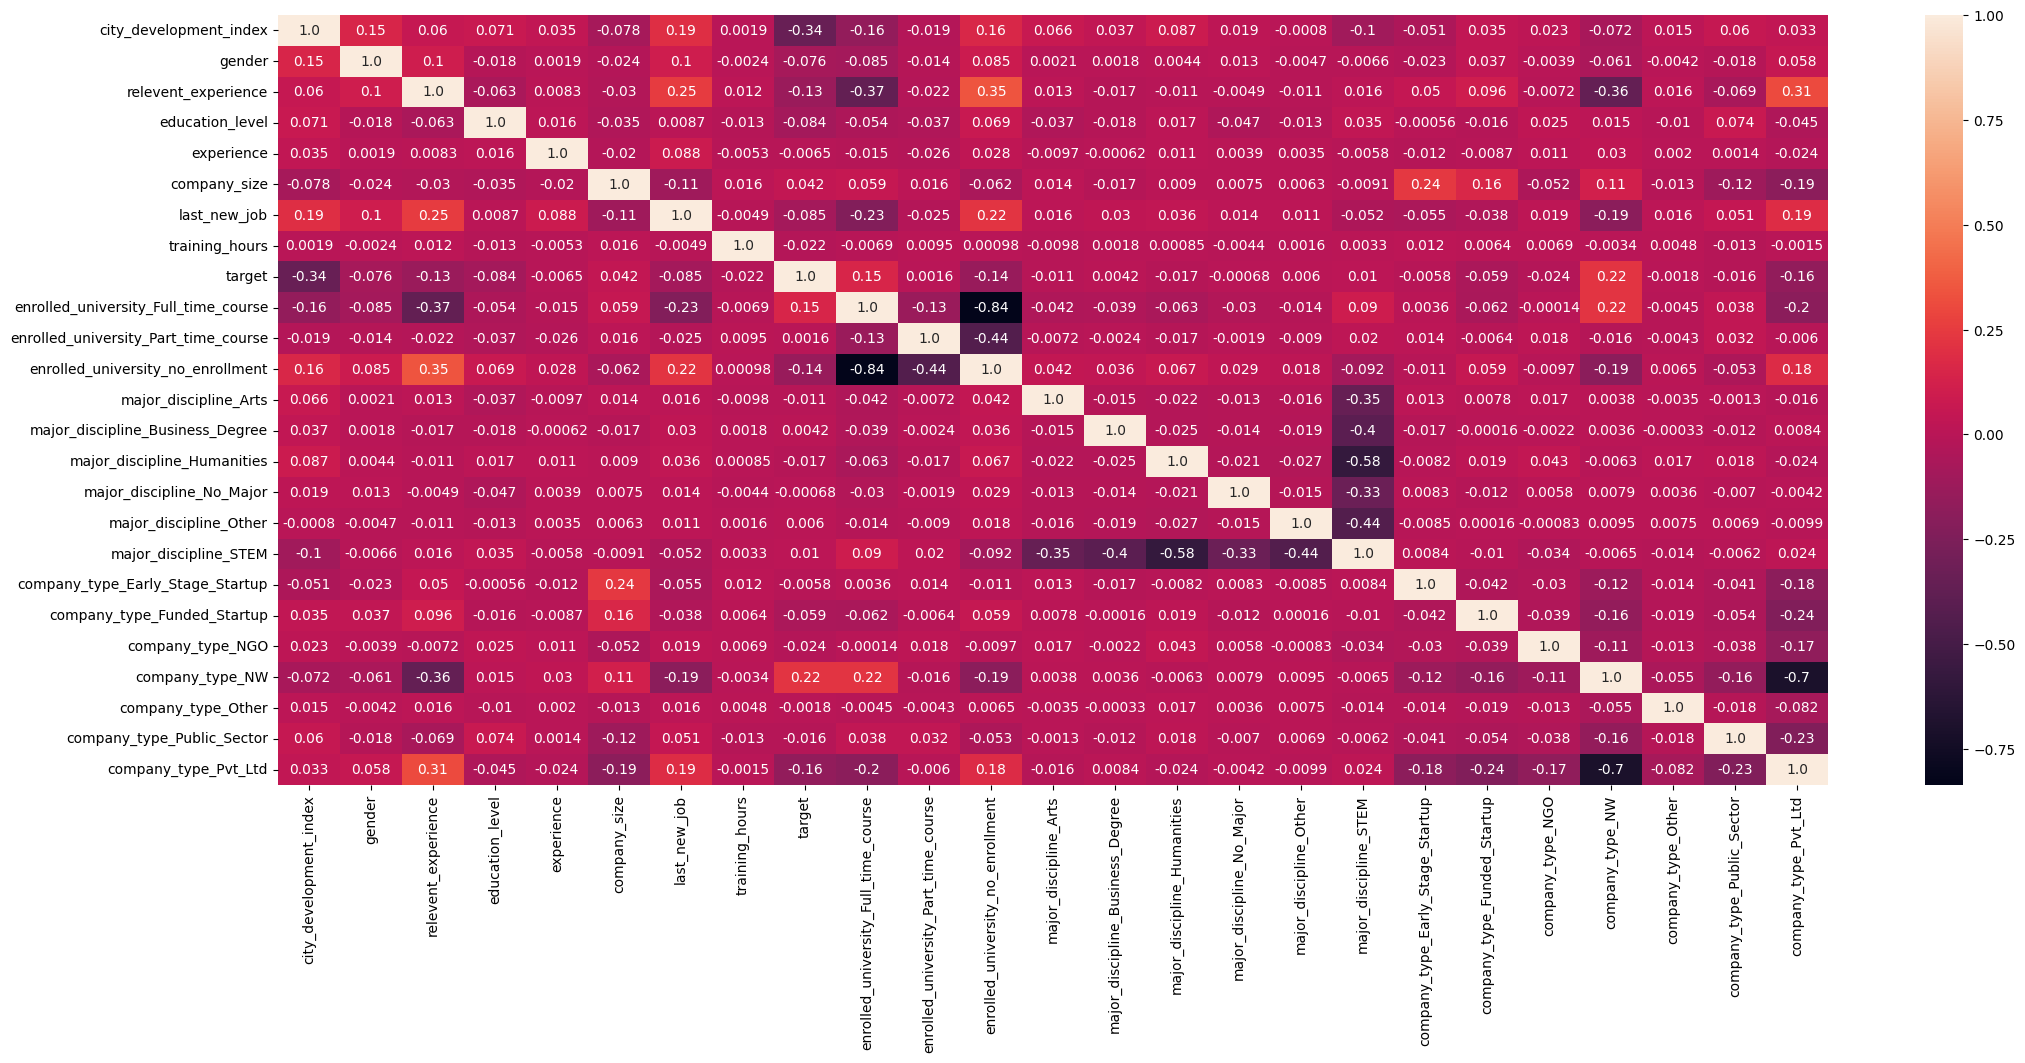

In [80]:
corr = train.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,fmt='.2')

In [81]:
X = train.drop("target",axis=1)
Y = pd.DataFrame(train["target"])
Y.head()

,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0


In [82]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,Y = smote.fit_resample(X,Y)

1.0    14381
0.0    14381
Name: target, dtype: int64


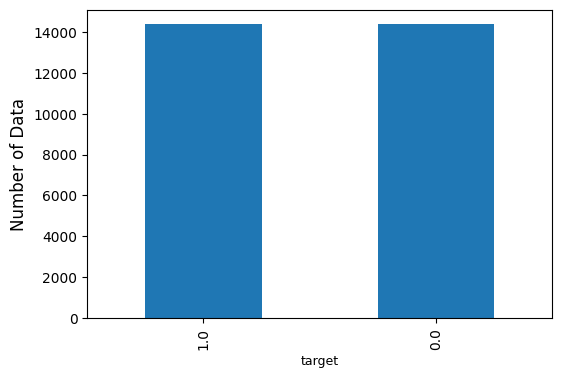

In [83]:
t = Y['target'].value_counts()
plt.figure(figsize=(6,4))
#sns.barplot(t.values,alpha=0.8)
t.plot.bar()
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(t)
plt.show()

In [84]:
t

1.0    14381
0.0    14381
Name: target, dtype: int64

In [85]:
X.tail()

,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,enrolled_university_Full_time_course,enrolled_university_Part_time_course,...,major_discipline_No_Major,major_discipline_Other,major_discipline_STEM,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd
28757,0.661653,2,0,0,8,2,0,49,0,0,...,0,0,1,0,0,0,1,0,0,0
28758,0.799836,1,0,0,14,2,0,307,0,0,...,0,0,1,0,0,0,1,0,0,0
28759,0.921731,2,0,0,1,1,0,40,1,0,...,0,0,1,0,0,0,0,0,0,0
28760,0.686543,2,0,0,13,3,2,8,1,0,...,0,0,1,0,0,0,0,0,0,0
28761,0.779404,2,0,0,7,0,5,23,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
#perform scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import joblib
scaler_x = MinMaxScaler()
X_scale= scaler_x.fit_transform(X)
X_scale

array([[0.94211577, 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65469062, 0.66666667, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.35129741, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.94557091, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47613336, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66148505, 0.66666667, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [87]:
Y= np.squeeze(Y)#numpy.squeeze() will just trim any redundant dimensions (i.e. which are of size 1).
#So, if your numpy array's shape is (100, 1), this will result in an array of shape (100,),
#whereas the result for a numpy array of shape (100, 2) will not change, as none of the dimensions have size 1

In [88]:
#performing train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y, test_size = 0.2, random_state=42)
x_test_copy = x_test.copy()

In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [90]:
##from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(random_state=100,solver='liblinear', penalty='l2', max_iter=5000)
#model = lr.fit(x_train,y_train)
#y_predictions = model.predict(x_test)

In [91]:
#confusion_matrix(y_test,y_predictions)
#y_predictions
#print("accuracy =",accuracy_score(y_test,y_predictions))
#print("precision =",precision_score(y_test,y_predictions))
#print("recall =",recall_score(y_test,y_predictions))
#print("f1_score =",f1_score(y_test,y_predictions))
##train_matrix = pd.crosstab(y_train, model.predict(x_train), rownames=['Actual'], colnames=['Predicted'])
##f,(ax1) = plt.subplots(1,1,sharey=True, figsize=(20, 3))
#g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
#g1.set_title("title")
##g1.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
#g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model.predict(x_test), y_test)))
#plt.show()

**DECESION TREE**

In [92]:
#from sklearn.tree import DecisionTreeClassifier
#dt_cls = DecisionTreeClassifier()
#model_dt = dt_cls.fit(x_train,y_train)
##y_pred_dt = model.predict(x_test)
#confusion_matrix(y_test,y_pred_dt)
#accuracy_score(y_test,y_pred_dt)
#print("precision =",precision_score(y_test,y_pred_dt))
#train_matrix = pd.crosstab(y_train, model_dt.predict(x_train), rownames=['Actual'], colnames=['Predicted'])
#f,(ax1) = plt.subplots(1,1,sharey=True, figsize=(20, 3))
#g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
#g1.set_title("title")
#g1.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
#g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model_dt.predict(x_test), y_test)))
#plt.show()

**SVM**

In [93]:
#from sklearn.svm import SVC
#svm_cls= SVC(kernel="linear")
##swm_cls = svm_cls.fit(x_train,y_train)
#y_pred_svm = svm_cls.predict(x_test)
#confusion_matrix(y_test,y_pred_svm)
#accuracy_score(y_test,y_pred_svm)
#svm_cls1 = SVC(kernel ='rbf')
#svm_cls1 = svm_cls1.fit(x_train,y_train)
#y_pred_svm1 =svm_cls1.predict(x_test)
#confusion_matrix(y_test,y_pred_svm1)
#accuracy_score(y_test,y_pred_svm1)
#train_matrix = pd.crosstab(y_train, svm_cls1.predict(x_train), rownames=['Actual'], colnames=['Predicted'])
#f,(ax1) = plt.subplots(1,1,sharey=True, figsize=(20, 3))
##g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
#g1.set_title("title")
#g1.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
#g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(svm_cls1.predict(x_test), y_test)))
#plt.show()

**KNN**

In [94]:
#from sklearn.neighbors import KNeighborsClassifier
#metric_k =[]
#neighbors = np.arange(3,11)
#for k in neighbors:
    ##classifier = KNeighborsClassifier(n_neighbors =k, metric='euclidean')
    #classifier.fit(x_train,y_train)
    #y_pred_s = classifier.predict(x_test)
    ##acc = accuracy_score(y_test,y_pred_s)
    #metric_k.append(acc)
#metric_k
#classifier = KNeighborsClassifier(n_neighbors =5, metric='euclidean')
##classifier.fit(x_train,y_train)
#y_pred_s= classifier.predict(x_test)
#metric_k.append(acc)

**XG_BOOSTER**

In [95]:
#import xgboost  as xgb
#xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
##xgb_model.fit(x_train, y_train)
#y_pred_xg = xgb_model.predict(x_test)
#xgb_acc = accuracy_score(y_test, y_pred_xg)
#conf_matrix = confusion_matrix(y_test, y_pred_xg)
#xgb_acc
#conf_matrix

**RANDOM FOREST CLASSIFIER**

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_cls =RandomForestClassifier(n_estimators=2000,criterion='entropy',max_depth=200,max_features="log2")
model_rf = rf_cls.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
confusion_matrix(y_test,y_pred_rf)


array([[2396,  481],
       [ 482, 2394]])

In [97]:
accuracy_score(y_test,y_pred_rf)

0.8326090735268555

In [98]:
#train_matrix = pd.crosstab(y_train, model_rf.predict(x_train), rownames=['Actual'], colnames=['Predicted'])
##f,(ax1) = plt.subplots(1,1,sharey=True, figsize=(20, 3))
#g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
#g1.set_title("title")
##g1.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
#g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model_rf.predict(x_test), y_test)))
#plt.show()

**from above Random Forest Classifier gives more accuracy and provides best fit model for this dataset.**

In [99]:
#Cross Validation
#from sklearn.model_selection import cross_val_score
#cross_val_scores = cross_val_score(rf_cls, x_train, y_train, cv=5, scoring='accuracy')
#print("Average Cross-Validation Accuracy:", cross_val_scores.mean())

**Load test dataset into python environment**

In [100]:
test = pd.read_csv("aug_test.csv")
# Display the first few rows of the test dataset
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [101]:
test.shape

(2129, 13)

In [102]:
test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [104]:
#formatting company_size for better use and understanding.
test['company_size'].replace(['<10','10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'],
                             ['Startup','Small','Small','Medium','Medium','Large','Large','Large'],inplace=True)
#formatting relevent_experience for better use and understanding.
test["relevent_experience"].replace(["Has relevent experience", "No relevent experience"],
                             ['Yes','No'],inplace=True)
#formatting last_new_job for better use and understanding.
test["last_new_job"].replace(["never"],["0"],inplace=True)
#Performing null value detection
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [105]:
test["company_size"].fillna(value="NW",inplace=True) #not working yet
test["company_type"].fillna(value="NW",inplace=True)
test["gender"].fillna(value="DNM",inplace=True) #Didnot mention
test["enrolled_university"].fillna(test["enrolled_university"].mode()[0], inplace = True)
test["education_level"].fillna(test["education_level"].mode()[0], inplace = True)
test["major_discipline"].fillna(test["major_discipline"].mode()[0], inplace = True)
test["experience"].fillna(test["experience"].mode()[0], inplace= True)
test["last_new_job"].fillna(test["last_new_job"].mode()[0], inplace= True)

In [106]:
test["major_discipline"].value_counts()

STEM               1933
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [107]:
test["company_size"].value_counts()

NW         622
Small      510
Large      428
Medium     406
Startup    163
Name: company_size, dtype: int64

In [108]:
test["company_type"].value_counts()

Pvt Ltd                1141
NW                      634
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
Name: company_type, dtype: int64

In [109]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [110]:
Z= test.drop(['enrollee_id',"city"],axis=1) # dropping enrollee id and city
Z

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,Male,Yes,Full time course,Graduate,STEM,9,Startup,NW,1,21
1,0.920,Female,Yes,no_enrollment,Graduate,STEM,5,NW,Pvt Ltd,1,98
2,0.624,Male,No,no_enrollment,High School,STEM,<1,NW,Pvt Ltd,0,15
3,0.827,Male,Yes,no_enrollment,Masters,STEM,11,Small,Pvt Ltd,1,39
4,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,Large,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,Male,No,no_enrollment,Graduate,Humanities,16,NW,Public Sector,4,15
2125,0.897,Male,Yes,no_enrollment,Masters,STEM,18,NW,NW,2,30
2126,0.887,Male,No,no_enrollment,Primary School,STEM,3,NW,Pvt Ltd,0,18
2127,0.804,Male,Yes,Full time course,High School,STEM,7,Medium,Public Sector,1,84


In [111]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Z["relevent_experience"] = le.fit_transform(Z["relevent_experience"])
Z["gender"] = le.fit_transform(Z["gender"])
Z["company_size"] = le.fit_transform(Z["company_size"])
Z["last_new_job"] = le.fit_transform(Z["last_new_job"])
Z["education_level"] = le.fit_transform(Z["education_level"])
Z["experience"] = le.fit_transform(Z["experience"])

In [112]:
Z.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,2,1,Full time course,0,STEM,19,4,NW,1,21
1,0.920,1,1,no_enrollment,0,STEM,15,2,Pvt Ltd,1,98
2,0.624,2,0,no_enrollment,1,STEM,20,2,Pvt Ltd,0,15
3,0.827,2,1,no_enrollment,2,STEM,2,3,Pvt Ltd,1,39
4,0.920,2,1,no_enrollment,0,STEM,21,0,Pvt Ltd,5,72


In [113]:
Z = pd.get_dummies(Z)
Z.head()

,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,enrolled_university_Full time course,enrolled_university_Part time course,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.827,2,1,0,19,4,1,21,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0.920,1,1,0,15,2,1,98,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.624,2,0,1,20,2,0,15,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.827,2,1,2,2,3,1,39,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.920,2,1,0,21,0,5,72,0,0,...,0,0,1,0,0,0,0,0,0,1


In [114]:
scaler_x = MinMaxScaler()
Z= scaler_x.fit_transform(Z)
pred_test = model_rf.predict(Z)


In [115]:
submission = pd.read_csv("sample_submission.csv")
submission

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5
...,...,...
2124,1289,0.5
2125,195,0.5
2126,31762,0.5
2127,7873,0.5


In [116]:
submission['enrollee_id']=test['enrollee_id']
submission['target']=pred_test
submission['target']

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
2124    0.0
2125    0.0
2126    0.0
2127    0.0
2128    0.0
Name: target, Length: 2129, dtype: float64

In [117]:
submission['enrollee_id']=test['enrollee_id']
submission['target']=pred_test


In [118]:
submission['target']

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
2124    0.0
2125    0.0
2126    0.0
2127    0.0
2128    0.0
Name: target, Length: 2129, dtype: float64

In [119]:
submission['target'].replace(0.0,'Not looking for Job change',inplace=True)
submission['target'].replace(1.0,'Looking for Job change',inplace=True)

In [120]:
pd.DataFrame(submission,columns=['enrollee_id','target']).to_csv('sub.csv',index=False)

In [121]:
import pickle

In [122]:
filename="job.pkl"

In [123]:
with open(filename,"wb") as file:
  pickle.dump(model_rf,file)

In [124]:
import joblib

In [125]:
scalerfile ="scaler.pickle"

In [126]:
with open(scalerfile,"wb") as file:
  pickle.dump(X_scale,file)

In [127]:
X_scale

array([[0.94211577, 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65469062, 0.66666667, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.35129741, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.94557091, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47613336, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66148505, 0.66666667, 0.        , ..., 0.        , 0.        ,
        1.        ]])